In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
path1 = r"F:\brain\brain_tumor_dataset"
cate = ['yes','no']


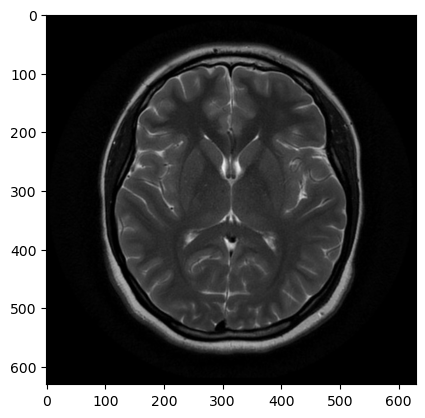

In [3]:
for i in cate:
    folders = os.path.join(path1 , i)
    for images in os.listdir(folders):
        image_path = os.path.join(folders,images)
        image_path = cv2.imread(image_path)
        plt.imshow(image_path)
        break

In [4]:
image_size = 200
input_image = []
for i in cate:
    folders = os.path.join(path1 , i)
    label = cate.index(i)
    for images in os.listdir(folders):
        image_path = os.path.join(folders,images)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array , (image_size,image_size))
        input_image.append([image_array,label])

In [5]:
len(input_image)

3897

In [6]:
np.random.shuffle(input_image)

In [7]:
train = input_image[0:745]
test =input_image[745::]

In [8]:
train_X = []
train_Y = []

for x_values,y_values in train:
    train_X.append(x_values)
    train_Y.append(y_values)

In [9]:
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [10]:
train_X=train_X/255

In [11]:
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [87]:
model = tf.keras.models.Sequential()
model.add(Conv2D(filters = 64 ,kernel_size=(5,5),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64 ,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(2,activation='softmax'))

In [88]:
model.compile(optimizer  = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [89]:
model.fit(train_X,train_Y,epochs = 9)

Epoch 1/9
24/24 [==============================] - 79s 3s/step - loss: 0.7416 - accuracy: 0.6188
Epoch 2/9
24/24 [==============================] - 74s 3s/step - loss: 0.5116 - accuracy: 0.7289
Epoch 3/9
24/24 [==============================] - 74s 3s/step - loss: 0.3811 - accuracy: 0.8362
Epoch 4/9
24/24 [==============================] - 73s 3s/step - loss: 0.2698 - accuracy: 0.8886
Epoch 5/9
24/24 [==============================] - 75s 3s/step - loss: 0.2177 - accuracy: 0.9168
Epoch 6/9
24/24 [==============================] - 75s 3s/step - loss: 0.1461 - accuracy: 0.9463
Epoch 7/9
24/24 [==============================] - 76s 3s/step - loss: 0.0642 - accuracy: 0.9826
Epoch 8/9
24/24 [==============================] - 74s 3s/step - loss: 0.0341 - accuracy: 0.9906
Epoch 9/9
24/24 [==============================] - 78s 3s/step - loss: 0.0217 - accuracy: 0.9973


In [90]:
test_x = []
test_y = []

for x_value,y_value in test:
    test_x.append(x_value)
    test_y.append(y_value)

In [91]:
test_x = np.array(test_x)
test_y = np.array(test_y)

In [92]:
test_x = test_x/255

In [93]:
pred = model.predict(test_x)

99/99 [==============================] - 105s 1s/step


In [94]:
pred_class = np.argmax(pred , axis =1)
pred_class

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score

In [98]:
#confusion_matrix(test_y,pred_class)

In [99]:
#accuracy_score(test_y,pred_class)

In [100]:
#recall_score(test_y,pred_class)

In [62]:
model.save('model.h5')

In [75]:
from  keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline
from tensorflow.keras.preprocessing import image

In [76]:
br_pr = load_model('model.h5')

In [81]:
import os 
os.chdir(r"F:\brain\brain_tumor_dataset")

In [85]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(image_size,image_size))  # data import 7 convert image into height= 64 , width = 64 
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = br_pr.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))
    print('Probability',Probability)
    if Probability > 0.5:
        print("It's a brain_tumore")
    else:
        print("no sign of brain_tumore")

1/1 [==============================] - 0s 250ms/step
Probability 0.99767846
It's a brain_tumore


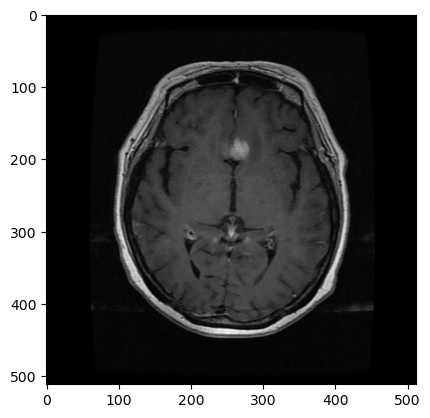

In [97]:
model_output('m2.jpg')